# Forecasting

https://unit8co.github.io/darts/README.html

### Install Dart

In [1]:
pip install darts

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


### Import Packages

In [8]:
import pandas as pd
from darts import TimeSeries
from darts.models import ExponentialSmoothing
from darts.metrics import mape
import matplotlib.pyplot as plt

Importing plotly failed. Interactive plots will not work.


### Read Dataset

In [30]:
import pandas as pd

# Load your dataset
data = pd.read_csv('train.csv')  # Replace with your actual file path

# Try to convert the 'date' column to datetime, and handle invalid formats


In [32]:
data = pd.read_csv('train.csv')  # Replace with your actual file path

# Convert 'date' column to datetime, handling invalid date formats
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Display rows with invalid date formats
invalid_dates = data[data['date'].isna()]
print("Rows with invalid date formats:")
print(invalid_dates)

Rows with invalid date formats:
Empty DataFrame
Columns: [date, store, item, sales]
Index: []


In [33]:
data = data.dropna(subset=['date'])

# Handle duplicate dates by grouping based on 'store' and 'item'
# Group by store, item, and date, then aggregate sales by summing them (or use another method if needed)
data = data.groupby(['store', 'item', 'date']).agg({'sales': 'sum'}).reset_index()

# Get the unique store-item pairs
store_item_pairs = data[['store', 'item']].drop_duplicates()

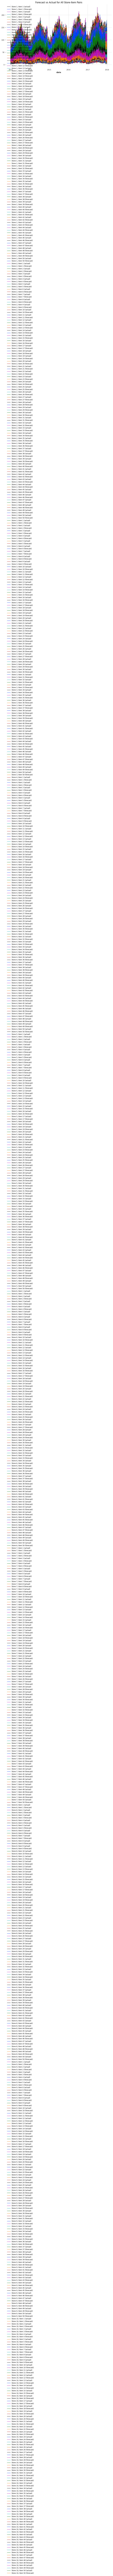

In [35]:
import pandas as pd
from darts import TimeSeries
from darts.models import ExponentialSmoothing
from darts.metrics import mape
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('train.csv')  # Replace with your actual file path

# Convert 'date' column to datetime, handling invalid date formats
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Drop rows with invalid date formats
data = data.dropna(subset=['date'])

# Group by store, item, and date, summing sales across duplicates
data = data.groupby(['store', 'item', 'date']).agg({'sales': 'sum'}).reset_index()

# Get the unique store-item pairs
store_item_pairs = data[['store', 'item']].drop_duplicates()

# Set up a plot figure
plt.figure(figsize=(10, 6))

# Iterate through each store-item pair and plot everything on a single figure
for index, row in store_item_pairs.iterrows():
    store = row['store']
    item = row['item']
    
    # Filter data for the current store-item pair
    filtered_data = data[(data['store'] == store) & (data['item'] == item)]
    
    # Set the date column as the index and ensure it is sorted
    filtered_data = filtered_data.set_index('date').sort_index()

    # Create a TimeSeries for the current store-item pair
    series = TimeSeries.from_dataframe(filtered_data, value_cols=['sales'], freq='D', fill_missing_dates=True)
    
    # Split the series into training and validation (let's say last 30 days for validation)
    train, val = series[:-30], series[-30:]

    # Exponential Smoothing model
    model = ExponentialSmoothing()
    model.fit(train)

    # Predict the next 30 days (length of the validation set)
    prediction = model.predict(len(val), num_samples=1000)

    # Plot the actual and forecasted values on the same plot
    series.plot(label=f"Store {store}, Item {item} (actual)", lw=1)
    prediction.plot(label=f"Store {store}, Item {item} (forecast)", lw=1)

# Customize the overall plot
plt.title("Forecast vs Actual for All Store-Item Pairs")
plt.legend(loc='best', fontsize='small')
plt.show()


In [37]:
import pandas as pd
from darts import TimeSeries
from darts.models import TBATS, ExponentialSmoothing, AutoARIMA
from darts.metrics import mape
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('train.csv')  # Replace with your actual file path

# Convert 'date' column to datetime, handling invalid date formats
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Drop rows with invalid date formats
data = data.dropna(subset=['date'])

# Group by store, item, and date, summing sales across duplicates
data = data.groupby(['store', 'item', 'date']).agg({'sales': 'sum'}).reset_index()

# Select the first 10 stores and first 10 products
top_10_stores = data['store'].unique()[:10]
top_10_items = data['item'].unique()[:10]

# Set up a plot figure for all store-item pairs
fig, axes = plt.subplots(5, 2, figsize=(15, 20))  # 5 rows and 2 columns for 10 subplots
axes = axes.flatten()  # Flatten axes to make it easier to iterate

# Iterate through each store-item pair and plot them
for i, (store, item) in enumerate(zip(top_10_stores, top_10_items)):
    # Filter data for the current store-item pair
    filtered_data = data[(data['store'] == store) & (data['item'] == item)]
    
    # Set the date column as the index and ensure it is sorted
    filtered_data = filtered_data.set_index('date').sort_index()

    # Create a TimeSeries for the current store-item pair
    series = TimeSeries.from_dataframe(filtered_data, value_cols=['sales'], freq='D', fill_missing_dates=True)
    
    # Split the series into training and validation (let's say last 30 days for validation)
    train, val = series[:-30], series[-30:]

    # Apply TBATS model for forecasting
    model = TBATS()
    model.fit(train)
    prediction = model.predict(len(val))

    # Plot on the corresponding subplot
    ax = axes[i]
    train.plot(ax=ax, label='train', lw=1, color='black')
    val.plot(ax=ax, label='true', lw=1, color='blue')
    prediction.plot(ax=ax, label='TBATS', lw=1, color='magenta')
    
    # Set title and labels
    ax.set_title(f"Store {store}, Item {item}")
    ax.legend(loc='upper left', fontsize='small')

# Display the plots
plt.tight_layout()
plt.show()


### Split Dataset

### Train model

### Visulaize Results

## Try Different Models

In [9]:
from darts.models import TBATS, AutoARIMA, Theta
from darts.metrics import mape


    
def eval_model(model, model_name):
    model.fit(train)
    forecast = model.predict(len(val))
    print("model {} obtains MAPE: {:.2f}%".format(model, mape(val, forecast))) 
    train.plot(label="train")
    val.plot(label="true")
    forecast.plot(label=model_name)

# Global models

### Load Datasets

### Data Scaling

### select Global model

Dart support below Global models
- BlockRNNModel
- RNNModel
- Temporal Convolutional Networks (TCNs)
- N-Beats
- Transformer model

Important input parameters:
- input_chunk_length: this is the length of the lookback window of the model; so each output will be computed by the model by reading the previous input_chunk_length points.

- output_chunk_length: this is the length of the outputs (forecasts) produced by the internal model. 

In [18]:
from darts.models import NBEATSModel

model_air_milk = NBEATSModel(
    input_chunk_length=24, output_chunk_length=12, n_epochs=100, random_state=0
)